Script generating spiking plot in the paper by loading recorded spike data.

In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
import shelve
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nengo_spa as spa

from nengo_extras.plot_spikes import (
    cluster, merge, plot_spikes, preprocess_spikes, sample_by_variance)
from nengo.utils.matplotlib import rasterplot

In [3]:
sns.set(font_scale=1.25)

In [4]:
spikesdir = os.path.join(os.path.curdir, 'results', 'spikes')
d = shelve.open(os.path.join(spikesdir, 'spikeplot'))

# Results

In [5]:
d["experiment-sheet"][9:13]

,r_tstart,r_tend,trial,match,stimulus,target,similarity,choice,rule,rule_seq_id,correct,n_categories,error,p_error,p_response,fail_shift
9,6.44,6.74,10,CN,R-CR-ONE,1,0.912772,1,N,0,4,1,0,0,0,0
10,7.04,7.34,11,N,B-TR-FOUR,3,0.937479,4,S,0,X,2,1,1,1,0
11,7.64,7.94,12,CS,B-CR-FOUR,2,0.955774,2,S,0,1,2,0,0,0,0
12,8.31,8.61,13,S,G-ST-THREE,4,0.911664,4,S,0,2,2,0,0,0,0


In [6]:
from matplotlib import rc
rc("font", family="serif")

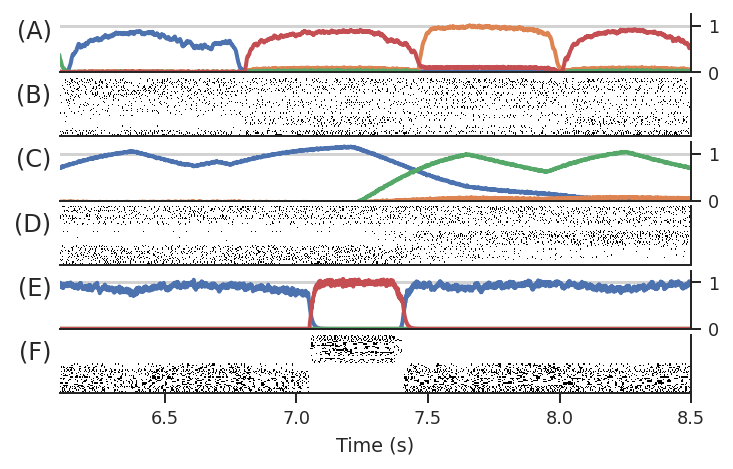

In [7]:
f = 2
tstart, tend = 6.1, 8.5  # these are readouts from the results sheet above

sns.set_style("white")
sns.set_context("paper")

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(f*2.83, f*10.46/6))
fig.subplots_adjust(hspace=.1)

sns.set(font_scale=1, style='white')

# Row 1: Response card (choice) - SP
colors_c = {'C1':'blue', 'C2': 'orange', 'C3': 'green','C4': 'red'}
axes[0].plot(d["simt"], spa.similarity(d["p_choice"], d["vocabs-choice"]), lw=2)

# Row 2: Response card - spikes
plot_spikes(
    *merge(
        *cluster(
            *sample_by_variance(
                d["simt"], d["ps_choices"],
                num=100, filter_width=.02),
            filter_width=.002),
        num=50),
ax=axes[1],
contrast_scale=0.1
)


# Row 3: Rule (guess) - SP
axes[2].plot(d["simt"], spa.similarity(d["p_guess"], d["vocabs-gate"]), lw=2)

# Row 4: Rule - Spikes
plot_spikes(
    *merge(
        *cluster(
            *sample_by_variance(
                d["simt"], d["ps_guess"],
                num=100, filter_width=.02),
            filter_width=.002),
        num=50),
ax=axes[3],
contrast_scale=0.1
)

# Row 5: Thalamus - SP
axes[4].plot(d["simt"], d["p_th"], lw=2)

# Row 6: Thalamus - Spikes
plot_spikes(*preprocess_spikes(d["simt"], d["ps_thalamus"]), ax=axes[5], contrast_scale=0.1)

alph = 'ABCDEF'
for i, ax in enumerate(axes):
    ax.set_xlim(tstart, tend)
    ax.set_ylabel('({})'.format(alph[i]), rotation=0, ha='right', fontsize=12)
    if i%2==0:
        ax.set_ylim(0, 1.25)
        ax.yaxis.tick_right()
        ax.tick_params(
            axis='y',          
            which='both',
            left=True) # left means right because of tick_right()
        ax.hlines(1, 0, tend, color='#D3D3D3')
    else:
        ax.set_yticks([])

    if alph[i] != 'F': 
        ax.set_xticks([])
    else:
        ax.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=True)
        ax.set_xlabel('Time (s)')

sns.despine(left=True, right=False)
# plt.savefig('spikes.svg', bbox_inches='tight', dpi=300)